In [1]:
#########################################################################
# Usando una red convolucional 
#########################################################################
# Ejecutando todo de extremo a extremo en los datos de entrada. 
# Esto nos permite utilizar el aumento de datos, 
# Realizado por Ximena Rios- Universidad del Valle
#########################################################################

In [2]:
#Parametros generales
IMG_ALTO = 150
IMG_ANCHO =150
LOTE_SIZE = 32 #tamaño de los lotes de datos

#Definir los directorios de trabajo 
import os
train_dir = os.getcwd() + '/base_datos/train/'
validacion_dir= os.getcwd() + '/base_datos/validacion/'
test_dir = os.getcwd() + '/base_datos/test/'

#Definir el nombre para guardar el modelo y los datos 
nombre=('Conv')

In [3]:
from keras import layers
from keras import models
import numpy as np
import os
import visualPavLib

Using TensorFlow backend.


In [4]:
#Arquitectura de la red (small convnet)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_ALTO, IMG_ANCHO, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#https://www.tensorflow.org/api_docs/python/tf/keras/Model?version=stable

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [6]:
#adicionar dropout
model.add(layers.Dropout(0.5))
#Adding a classifier on top of the convnet
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(15, activation='softmax')) #capa densa de tamaño 15. para cada entrada la red saca un vector de 15 dimensiones. cada entrada en este vector codifica una clase diferente de salida 
# activacion softmax significa que la red puede sacar una distribucion de probabilidad sobre 15 diferentes clases de salida

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [8]:
#compilar
from keras import optimizers
model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy', #funcion de activacion para clasificacion multiclase
    metrics=['acc'])  #categorical_crossentropy, espera que las etiquetas sigan una codificación categórica
    #categorical--> will be 2D one-hot encoded labels

In [9]:
#Crear una instancia de la clase ImageDataGenerator para el aumento de datos
from keras.preprocessing.image import ImageDataGenerator
train_dir = os.getcwd() + '/base_datos/train/'
validacion_dir= os.getcwd() + '/base_datos/validacion/'
train_datagen = ImageDataGenerator(
            rescale=1./255, # Todas las imágenes serán reescaladas por 1./255
            width_shift_range=0.2, #son rangos(una fraccion del total) dentro de los cuales se puede trasladar una figura aleatoreamente
            height_shift_range=0.2, 
            zoom_range=0.2, 
            horizontal_flip=True, #Voltear aleatoriamente las entradas horizontalmente
            vertical_flip=True, 
            fill_mode='nearest') #nearest #reflect constant
#Note que los datos de validacion no deben ser aumentados!!!
test_datagen = ImageDataGenerator(rescale=1./255)


##https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator?version=stable

In [10]:
#Generar datos por el metodo flow_from_directory de la clase ImageDataGenerator
train_generator = train_datagen.flow_from_directory(
    train_dir,# Este es el directorio objetivo
    target_size=(IMG_ALTO, IMG_ANCHO), # Tamaño de las imágenes (serán redimensionadas)
    batch_size=LOTE_SIZE, #tamaño de los lotes de datos (cantidad de imagenes generadas)
    #save_to_dir=os.getcwd() + '/base_datos/AumenTrain/',
    class_mode='categorical') # Como usamos la funcion de pérdida categorical_crossentropy, necesitamos etiquetas categorical
    #categorical --> will be 2D one-hot encoded labels
    #produce lotes de imágenes RGB de 150x150 (forma (32, 150, 150, 3)) y etiquetas 2D one-hot  (forma (32,))
#Datos de validacion
validation_generator = test_datagen.flow_from_directory(
    validacion_dir,
    target_size=(IMG_ALTO, IMG_ANCHO),
    batch_size=LOTE_SIZE,
    #save_to_dir=os.getcwd() + '/base_datos/AumenVal/',
    class_mode='categorical')

Found 4664 images belonging to 15 classes.
Found 591 images belonging to 15 classes.


In [11]:
total_imagenes = visualPavLib.contar_Imagenes('/home/ximena/tesis/VisualPav/base_datos/train/')
total_imagenes

4664

Se generan imagenes de la forma: (32, 150, 150, 3)  Con etiquetas one-hot de la forma: (32, 15)


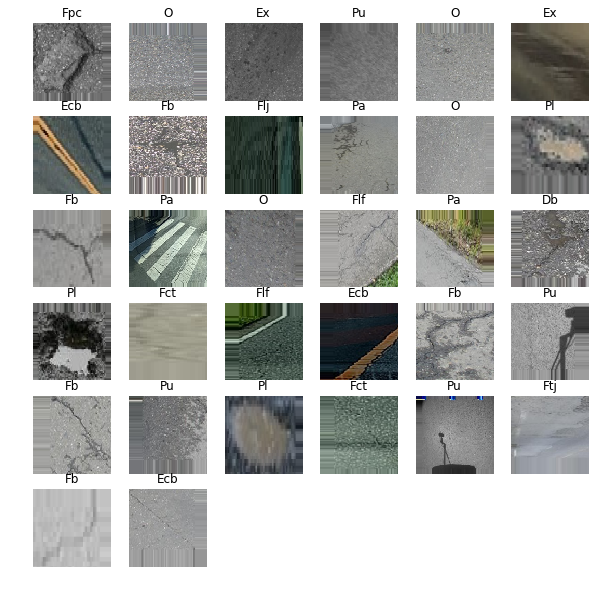

In [12]:
#Segmento de codigo para observar imagenes generadas del aumento de datos
import matplotlib.pyplot as plt
# Generar un nuevo lote con "LOTE_SIZE" imagenes 
image_batch, label_batch = next(train_generator)
# Retorna un arreglo con los nombres de las etiquetas del conjunto de entrenamiento
CLASS_NAMES =visualPavLib.nombre_etiqueta('/home/ximena/tesis/VisualPav/base_datos/train/')

def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(LOTE_SIZE):
      ax = plt.subplot(np.ceil(np.sqrt(LOTE_SIZE)),np.ceil(np.sqrt(LOTE_SIZE)),n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')
        
show_batch(image_batch, label_batch)
print('Se generan imagenes de la forma:',image_batch.shape,' Con etiquetas one-hot de la forma:',label_batch.shape)

In [13]:
#Entrenar la red
STEPS_PER_EPOCH = np.ceil(total_imagenes/LOTE_SIZE) ##cuántas muestras extraer del generador antes de declarar una época finalizada
#STEPS_PER_EPOCH = 120
history = model.fit_generator(
    train_generator, #un generador Python que genere lotes de entradas y targets indefinidamente
    steps_per_epoch=STEPS_PER_EPOCH, #100 #2000 #cuántas muestras extraer del generador antes de declarar una época finalizada
    epochs= 30, #100,  #30, #50
    validation_data=validation_generator,
    validation_steps=30 ) #800

Epoch 1/30
146/146 [==============================] - 59s 404ms/step - loss: 2.5278 - acc: 0.2043 - val_loss: 2.6647 - val_acc: 0.2566
Epoch 2/30
146/146 [==============================] - 54s 370ms/step - loss: 2.3123 - acc: 0.2613 - val_loss: 2.1210 - val_acc: 0.2970
Epoch 3/30
146/146 [==============================] - 55s 378ms/step - loss: 2.2067 - acc: 0.2952 - val_loss: 2.0365 - val_acc: 0.3033
Epoch 4/30
146/146 [==============================] - 55s 373ms/step - loss: 2.0819 - acc: 0.3353 - val_loss: 1.7816 - val_acc: 0.4244
Epoch 5/30
146/146 [==============================] - 55s 379ms/step - loss: 1.9819 - acc: 0.3786 - val_loss: 1.7317 - val_acc: 0.4825
Epoch 6/30
146/146 [==============================] - 55s 380ms/step - loss: 1.8844 - acc: 0.4050 - val_loss: 1.7109 - val_acc: 0.4471
Epoch 7/30
146/146 [==============================] - 54s 372ms/step - loss: 1.8293 - acc: 0.4147 - val_loss: 1.5927 - val_acc: 0.5184
Epoch 8/30
146/146 [==============================] - 5

In [14]:
#history_dict = history.history
#history_dict.keys()

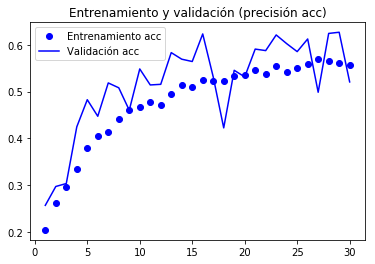

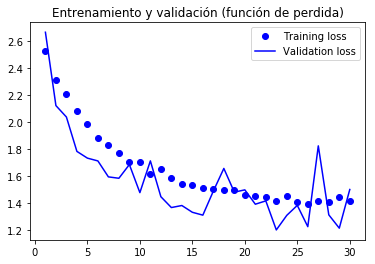

In [15]:
#graficar
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Entrenamiento acc')
plt.plot(epochs, val_acc, 'b', label='Validación acc')
#plt.xlabel('Epochs'); plt.ylabel('acc')
plt.title('Entrenamiento y validación (precisión acc)')
plt.legend()
plt.savefig(nombre+'.png') #guardar figura #plt.savefig('VGG16.png')

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Entrenamiento y validación (función de perdida)')
plt.legend()
plt.savefig(nombre+'L.png') #guardar figura #plt.savefig('VGG16L.png')
plt.show()

In [17]:
#########################################################################
# Evaluar el modelo cargado con los datos de test
#########################################################################
#Generar datos por el metodo flow_from_directory de la clase ImageDataGenerator
#Datos de test
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')
#Evaluar el modelo con los datos de test
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc,'  test loss:', test_loss )

Found 585 images belonging to 15 classes.
test acc: 0.5401015257472315   test loss: 1.531363712349519


In [18]:
#guardar un modelo 
model.save(nombre+'.h5') #model.save('conv_3.h5')

In [19]:
#guardar el history para graficar despues
import json
with open(nombre+'History.json', 'w') as f:
#with open('conv_3.json', 'w') as f:
    json.dump(history.history, f)

In [20]:
#guardar la precision de test
import json
with open(nombre+'Test.json', 'w') as f:
#with open('VGG16Test.json', 'w') as f:
    json.dump((test_loss, test_acc), f)